**Лабораторная работа №5.**

**Python. venv. Joblib. PyTorch.**

**Цель работы.**

Ознакомление с виртуальными средами, пакетами venv, joblib, PyTorch.

**ВНИМАНИЕ**, для выполнения лабораторных работ вам **НЕОБХОДИМА** учетная запись Google.


---


# 1. venv. anaconda.


---

---

**Виртуальная среда. venv**

---


Использование виртуальных сред является хорошей практикой при реализации проектов по машинному обучению на Python.

При запуске команды Python в вашем терминале, например !python --version, можно условно представлять себе, что это - «основной» Python в вашей системе. Рекомендуется хранить эту основную установку без каких-либо пакетов и использовать ее для создания отдельных сред для каждого приложения, над которым вы работаете — таким образом, каждое приложение может иметь свои собственные зависимости и пакеты, и вам не придется беспокоиться о потенциальных проблемах совместимости из-за разных версий пакетов.

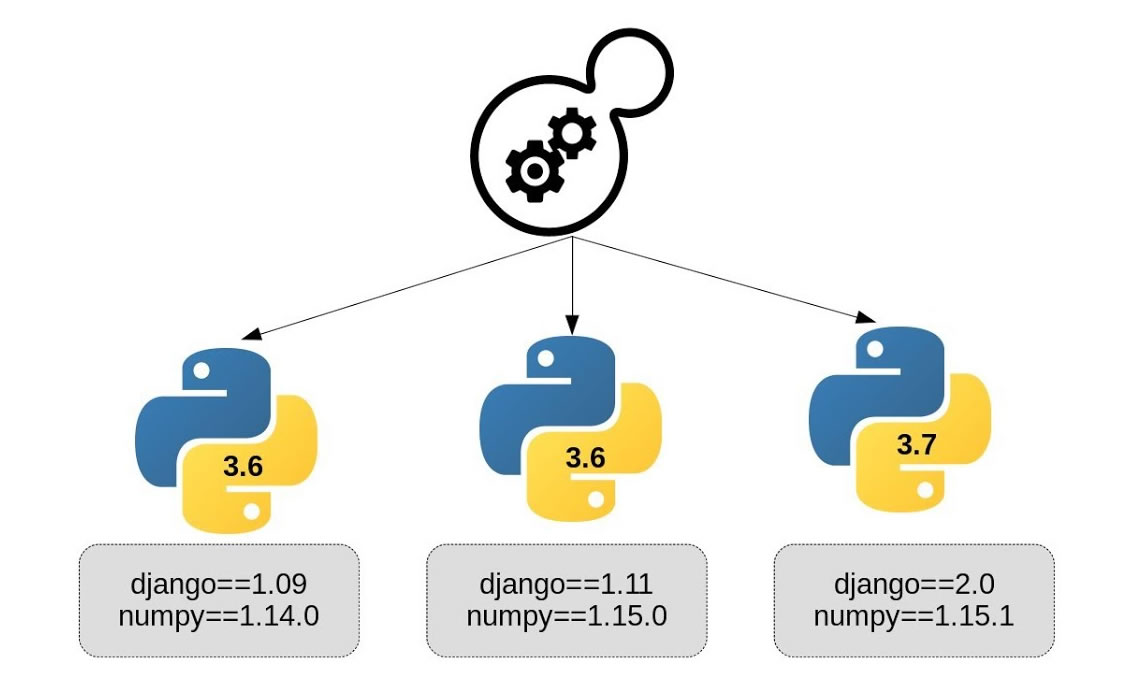

Виртуальная среда Python состоит из двух основных компонентов:

* интерпретатора Python определенной версии, на котором работает виртуальная среда,
* папки, содержащей сторонние библиотеки определенных версий, установленные в виртуальной среде.

Эти виртуальные среды изолированы друг от друга, что означает, что любые изменения в зависимостях, установленных в виртуальной среде, не влияют на зависимости других виртуальных сред или общесистемных библиотек.

Таким образом, мы можем:
* довольно радикально решать вопрос менеджмента зависимостей проектов, над которыми работаем.

* Версией Python и установленными пакетами в виртуальной среде можно поделиться с другими в форме файла requirements.txt или environment.yml . Эти файлы можно использовать совместно для создания той же среды на другом компьютере или для того, чтобы та же среда могла быть воспроизведена другим программистом. **Однако именно для решения проблемы воспроизводимости проектов машинного обучения, проекты чаще всего инкапсулируются в контейнеры Docker, без использования вирутальных сред.**

**Использование виртуальных сред более актуально для локальных установок, в случае Google Colab особого смысла использовать их нет, так как мы можем прописать в начале блокнотов Jupyter команды отката/апгрейда к необходимым версиям пакетов, если нужно.**

Доступ к пути к файлу текущего работающего интерпретатора Python можно получить с помощью модуля `sys` . `sys.prefix` выведет системный путь для работающего интерпретатора Python.

In [ ]:
import sys
sys.prefix

Или можно использовать команду терминала which python:

In [ ]:
!which python

Доступ к списку установленных пакетов в текущей среде можно получить с помощью модуля `site` . `site.getsitepackages()` вернет путь к файлу, в котором хранятся пакеты сайта. В приведенном ниже коде будут перечислены все установленные пакеты с использованием модуля `os` и `os.listdir()` отображено содержимое каталога, в котором хранятся пакеты сайта.

In [ ]:
import os
import site
from IPython.display import clear_output
print(site.getsitepackages())
for package in os.listdir(site.getsitepackages()[0]):
  print(package)
  clear_output(wait=True)

In [ ]:
os.listdir(site.getsitepackages()[0])

Кстати говоря, в блокнотах Jupyter можно воспользоваться командой clear_output для очистки вывода ячейки программно. Аргумент wait позволяет отложить очистку до поступления новой команды вывода. Разницу можно пронаблюдать в двух последующих ячейках.

In [ ]:
from IPython.display import clear_output
from time import sleep

for i in range(10):
    clear_output(wait=False)
    sleep(1)
    print("Hello World!", i)

In [ ]:
from IPython.display import clear_output
from time import sleep

for i in range(10):
    clear_output(wait=False)
    sleep(1)
    print("Hello World!", i)

Возвращаясь к теме виртуальных сред, cуществует два инструмента для настройки виртуальных сред: virtualenv и [venv](https://docs.python.org/3/library/venv.html), которые мы можем использовать практически взаимозаменяемо. virtualenv поддерживает более старые версии Python и его необходимо установить с помощью этой pip команды. Напротив, venv используется только с Python 3.3 или выше и включен в стандартную библиотеку Python, не требуя установки. Чаще всего используется встроенный пакет venv.


Для создания и активации виртуальной среды, понадобится следующая примерная последовательность команд:

In [ ]:
!apt install python3.10-venv # нужно только для колаба
clear_output()

In [ ]:
!mkdir new-python-prj # создаем папку проекта

In [ ]:
!python3 -m venv new-python-prj/.venv # создаем виртуальную среду в папке .venv

Разделяя команды `;`, выполняем последовательность команд, проверяем среду.

In [ ]:
!source new-python-prj/.venv/bin/activate; which python; python --version

Первая команда в вышеприведенной ячейке активирует виртуальную среду, после её выполнения появится название среды в скобках и ожидается следующая команда, но уже в виртуальной среде, примерно следующего вида:
`(.venv) $ `

Для создания виртуальной среды используется именно та версия Python, из алиаса которой (например, python3, как указано выше) вызывается пакет venv. Для создания виртуальных сред с другими версиями Python, необходимо предварительно их установить, установить симлинки, алиасы, и вызывать venv из них. Либо можно использовать, например, [pyenv](https://github.com/pyenv/pyenv), который позволяет переключаться между несколькими версиями Python.

Инструменты для создания и переключения между виртуальными средами также встроены в соответствующие IDE:

 * [Pycharm](https://www.jetbrains.com/help/pycharm/creating-virtual-environment.html#python_create_virtual_env)

 * [VS Code](https://code.visualstudio.com/docs/python/environments)

---

**conda**

---

Порою, при работе с материалами по Python и машинному обучению, вы можете встретить упоминания `conda`. [Anaconda Python](https://www.anaconda.com/) — дистрибутив языков программирования Python и R с открытым исходным кодом для ОС Windows, Linux и MacOS, в который входит набор свободных библиотек, система управления пакетами Сonda, менеджев виртуальных сред и другие компоненты. Conda написана на Python, но является языково-независимой, то есть может работать с проектами, написанными на любом языке программирования (в отличии от менеджера пакетов pip). Кроме того, с ее помощью можно установить и сам Python — возможность, предусмотренная далеко не во всех менеджерах пакетов, написанных на этом ЯП.

Anaconda — не просто набор отдельных библиотек, а полноценная интегрированная среда разработки. То есть, все входящие в нее пакеты и инструменты настроены так, чтобы работать совместно. Ее основное отличие от других менеджеров пакетов, таких как pip, заключается в том, что установка библиотек происходит с учетом уже установленных версий и их особенностей. Когда pip инсталлирует пакет, он автоматически устанавливает все зависимости Python без проверки их совместимости с уже имеющимися на компьютере. Например, пользователь, у которого уже установлена рабочая сборка, к примеру Google Tensorflow, использует pip для установки пакета, требующего другой версии зависимой библиотеки Numpy, а не той, которая на данный момент задействована в Tensorflow. Из-за этого он может столкнуться с тем, что сборка либо перестает работать вообще, либо дает искаженные результаты при проведении расчетов. В то же время менеджер пакетов Conda сначала проверяет текущую среду, в том числе все установленные в настоящее время пакеты, а также ограничения их версий. И уже на основе этого анализа программа либо подбирает совместимый с ними комплект зависимостей, либо уведомляет пользователя, что это невозможно.  

Для многих задач в области научных и инженерных вычислений, обработки данных не требуется того широкого функционала, который предлагает Anaconda. К тому же, чем больше библиотек, тем больше места они занимают на жестком диске компьютера. Для экономии свободного пространства можно использовать минимальный дистрибутив, который называется [Miniconda](https://docs.anaconda.com/free/miniconda/index.html). **Однако чаще всего, можно обойтись возможностями venv и pip.**


---


# 2. Параллельные вычисления. Joblib.


---

В задачах машинного обучения при выполнении вычислений и обработке больших объемов данных зачастую есть возможности для распараллеливания. Все современные ЦП имеют, как минимум, несколько ядер, которые можно задействовать параллельно.

В Python уже есть реализация параллелизма на основе встроенного модуля [multiprocessing](https://docs.python.org/3/library/multiprocessing.html), однако в Jupyter Notebook он не будет работать. Jupyter запускает ядро Python в собственном процессе, который уже выполняет код ячеек, и при попытке использования multiprocessing в ячейке происходит попытка создания нового дочернего процесса внутри уже существующего процесса, что вызывает конфликт. Также, Jupyter Notebook сам по себе является интерактивной средой, где можно выполнять код в ячейках в любом порядке и в любое время. Однако multiprocessing требует выполнения кода в основном (главном) модуле программы, что делает комбинирование работы пакета с Jupyter Notebook довольно затруднительной и запутанной.

Пакет [joblib](https://joblib.readthedocs.io/en/latest/) предоставляет простой интерфейс для параллельного выполнения задач на нескольких ядрах процессора, и она может быть использована в Jupyter Notebook.

Основное отличие между multiprocessing и joblib заключается в том, как они взаимодействуют с интерпретатором Python. В отличие от multiprocessing, joblib использует фоновые, не дочерние, процессы, которые запускаются независимо от основного процесса Jupyter Notebook.

Число ядер можно определить с помощью методов пакетов multiprocessing и os:

In [29]:
import multiprocessing
import os

print(multiprocessing.cpu_count())
print(os.cpu_count())

8
8


В Google Colab предоставляется достаточно мало ядер, поэтому параллелизм на уровне CPU чаще всего вряд ли даст большой выигрыш.

Joblib предоставляет класс `Parallel`, который позволяет распределить выполнение итераций цикла или вызовы функций на несколько ядер процессора. Он может использовать различные методы параллелизма, включая использование процессов или потоков. Аргумент `Parallel` `n_jobs` определяет число задейстованных ядер CPU (-1 означает использование всех), `verbose` - уровень и кол-во выводимой статусной информации. В аргументе функции `delayed` обозначается название функции, без её явного вызова с аргументами. Дальше необходимо, в отдельных скобках, указать аргументы функции и механизм их итерации (в нижеприведенном примере используется `for`).

In [12]:
!pip install joblib

  Using cached torch-2.3.0-cp312-cp312-manylinux2014_aarch64.whl.metadata (26 kB)
  Using cached filelock-3.14.0-py3-none-any.whl.metadata (2.8 kB)
  Using cached typing_extensions-4.11.0-py3-none-any.whl.metadata (3.0 kB)
  Using cached jinja2-3.1.4-py3-none-any.whl.metadata (2.6 kB)
  Using cached fsspec-2024.3.1-py3-none-any.whl.metadata (6.8 kB)
  Using cached MarkupSafe-2.1.5-cp312-cp312-manylinux_2_17_aarch64.manylinux2014_aarch64.whl.metadata (3.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 MB 4.5 MB/s eta 0:00:0000:0100:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.0/172.0 kB 4.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.3/133.3 kB 8.8 MB/s eta 0:00:00


In [42]:
from joblib import Parallel, delayed
import numpy as np
import os
from time import sleep

# определяем функцию, выполняющуюся параллельно
def vector_scaling(vector):
    result = (vector - np.min(vector)) / (np.max(vector) - np.min(vector))
    sleep(0.01)
    return result

N_CORES = os.cpu_count()

В Jupyter Notebook вы можете использовать magic commands - %time, %%time, %timeit и %%timeit для измерения времени выполнения вашего кода без необходимости импортировать модуль [timeit](https://docs.python.org/3/library/timeit.html).

Команда `%time` позволяет измерить время одного выполнения первой следующей команды.

Команда `%timeit` запускает  первой следующей команды несколько раз, а затем возвращает среднее и стандартное отклонение времени выполнения.

Команда `%%time` позволяет измерить время одного выполнения всей ячейки.

Команда `%%timeit` запускает код ячейки несколько раз, а затем возвращает среднее и стандартное отклонение времени выполнения.

In [46]:
# здесь замеряем только первую команду
%time
X = np.random.rand(100,200)
sleep(2)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 31.5 µs


In [49]:
%%time
# здесь замеряем всю ячейку
X = np.random.rand(100,200)
sleep(2)

CPU times: user 2.48 ms, sys: 38 µs, total: 2.52 ms
Wall time: 2 s


В нижеприведенном примере замерим время выполнения ячейки (`np.random.seed(0)` позволяет нам зафиксировать seed генератора псевдослучайных чисел, для воспроизводимости).

In [48]:
%%time
np.random.seed(0)
X = np.random.rand(100,200)
data = Parallel(n_jobs=N_CORES, verbose=10)(delayed(vector_scaling)(array) for array in X)

CPU times: user 53.4 ms, sys: 2.94 ms, total: 56.3 ms
Wall time: 160 ms


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Batch computation too fast (0.014218807220458984s.) Setting batch_size=2.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Batch computation too fast (0.03370380401611328s.) Setting batch_size=4.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Batch computation too fast (0.06862282752990723s.) Setting batch_size=8.
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  85 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  96 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.2s finished


Мы можем по разному обрабатывать данные параллельно. В указанных ниже примерах можно на каждый обрабатываемый функцией вектор создавать новый поток, либо использовать только несколько постоянных потоков, обрабатывающих подмассивы. В первом случае затраты на создание потоков увеличивают время выполнения задачи. В конечном случае, оба способа имеют место, но выбор между ними зависит от конкретной задачи.

In [50]:
%%timeit

# обработка подмассива строк/векторов
def vector_scaling(arr):
    result = [(vector - np.min(vector)) / (np.max(vector) - np.min(vector)) for vector in arr]
    sleep(0.01)
    return result

np.random.seed(0)
X = np.random.rand(100,200)
# делим массив на подмассивы
split_X = np.array_split(X, N_CORES)
data = Parallel(n_jobs=N_CORES)(delayed(vector_scaling)(array) for array in split_X)

25.4 ms ± 818 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [51]:
%%timeit

# обработка отдельных строк/векторов
def vector_scaling(vector):
    result = (vector - np.min(vector)) / (np.max(vector) - np.min(vector))
    sleep(0.01)
    return result

np.random.seed(0)
X = np.random.rand(100,200)
# итерируем не по подмассивам, а построчно
data = Parallel(n_jobs=N_CORES)(delayed(vector_scaling)(array) for array in X)

168 ms ± 854 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)



---


# 3. Pytorch


---

PyTorch — это часто используемый пакет для машинного и глубокого обучения с открытым исходным кодом.

In [52]:
import torch
torch.__version__

'2.3.0'

Тензоры — это основное понятие в PyTorch, представление данных в числовом виде. Фактически, подразумевается многомерный массив (как ndarray в numpy). Например, вы можете представить изображение в виде тензора с размерностью `[3, 224, 224]`, формально заданной как `[colour_channels, height, width]`, означающей, что изображение имеет 3 цветовых каналы (красный, зеленый, синий), высоту `224` пикселя и ширину `224` пикселя.

Тензоры могут задаваться различными типами данных - полный список приведен [здесь](https://pytorch.org/docs/stable/tensors.html#data-types). Наиболее распространенный тип (и обычно используемый по умолчанию) — `torch.float32` или `torch.float` (32-битный с плавающей запятой). Но есть также 16-битные числа с плавающей запятой (`torch.float16` или `torch.half`) и 64-битные числа с плавающей запятой (`torch.float64` или `torch.double`). И чтобы еще больше запутать ситуацию, существуют также 8-битные, 16-битные, 32-битные, 64-битные целые числа и не только. Причина всего этого связана с точностью вычислений. Это важно для глубокого обучения и численных вычислений, типы данных с более низкой точностью, как правило, быстрее вычисляются и в каких-то случаях потерянная точность может быть несущественна или не так важна. Нейронные сети на базе мобильных устройств часто работают с 8-битными целыми числами, которые меньше по размеру и работают быстрее, но менее точны, чем их аналоги с плавающей запятой. Также в графическом процессоре могут быть оптимизированные инструкции для чисел с урезанной точностью.

Для определения скаляра (тензор нулевой размерности) с помощью PyTorch можно воспользоваться следующей формой записи (также указаны способы конвертации Python/Numpy <=> PyTorch):

In [53]:
# конвертация из Python в PyTorch
scalar = torch.tensor(7)
# конвертация из Numpy в PyTorch
array = np.arange(1.0, 8.0)
tensor = torch.from_numpy(array)
print(scalar)
# конвертация из PyTorch в Python/Numpy
print(torch.tensor(1.2).numpy())

tensor(7)
1.2


По умолчанию массивы NumPy создаются с использованием типа данных `float64`, и если вы преобразуете его в тензор PyTorch, он сохранит тот же тип данных. Однако во многих вычислениях PyTorch по умолчанию используется `float32`. Поэтому лучше указывать тип явно - `tensor = torch.from_numpy(array).type(torch.float32)`.

У тензоров (многомерных массивов) аналогично numpy можем проверить поля - число измерений (`ndim`), тип (`dtype`) и общую размерность (`shape`):

In [78]:
print(scalar.ndim, len(scalar.shape), scalar.shape, scalar.dtype)

0 0 torch.Size([]) torch.int64


Однако есть еще одно важное поле - `device`. Оно указывает, где хранится тензор - CPU или GPU (и какой именно GPU, если их несколько в системе)

In [55]:
scalar.device

device(type='cpu')

Ниже приведены примеры задания тензоров других размерностей:

In [56]:
# задание вектора
vector = torch.tensor([7, 7])
matrix = torch.tensor([[7, 8],
                       [9, 10]])
tensor3 = torch.tensor([[[1, 2, 3],
                        [3, 6, 9],
                        [2, 4, 5]]])
float_16_tensor = torch.tensor([3.0, 6.0, 9.0],
                               dtype=torch.float16) # dtype позволяет указать тип данных
tensor_float8 = float_16_tensor.type(torch.int8) # можно менять тип данных

Синтаксис Pytorch во многом похож на Numpy и пересекается по большинству операций. Индексация, умножение, вычитание, транспонирование и другие операции аналогичны.

In [57]:
# Стандартная numpy-подобная индексация и слайсинг:
tensor = torch.ones(4, 4)
tensor[:,1] = 0
print(tensor)

# Вы можете использовать torch.cat для объединения последовательности тензоров по заданному измерению.
# также есть torch.stack, другая операцию объединения тензоров, которая незначительно отличается от torch.cat.
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])
tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


In [77]:
# тензор случайных чисел [0.0, 1.0)
random_image_size_tensor = torch.rand(size=(224, 224, 3))
random_image_size_tensor.shape, random_image_size_tensor.ndim

(torch.Size([224, 224, 3]), 3)

In [59]:
# тензор, заполненный нулями
zeros = torch.zeros(size=(3, 4))
zeros, zeros.dtype

(tensor([[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]),
 torch.float32)

In [60]:
# тензор, заполненный единицами
ones = torch.ones(size=(3, 4))
ones, ones.dtype

(tensor([[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]),
 torch.float32)

In [61]:
# интервал чисел
zero_to_ten = torch.arange(start=0, end=10, step=1)
zero_to_ten

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [62]:
tensor = torch.tensor([1, 2, 3])
tensor + 10

tensor([11, 12, 13])

In [63]:
tensor * 10

tensor([10, 20, 30])

In [64]:
# поэлементное умножение тензоров
print(f"tensor.mul(tensor) \n {tensor.multiply(tensor)} \n")
# альтернативный вариант:
print(f"tensor * tensor \n {tensor * tensor}")

tensor.mul(tensor) 
 tensor([1, 4, 9]) 

tensor * tensor 
 tensor([1, 4, 9])


In [65]:
tensor = torch.tensor([[[1, 2, 3],
                        [3, 6, 9],
                        [2, 4, 5]]])
# матричное умножение
print(f"tensor.matmul(tensor.T) \n {tensor.matmul(tensor.T)} \n")
# альтернативный вариант:
print(f"tensor @ tensor.T \n {tensor @ tensor.T}")

tensor.matmul(tensor.T) 
 tensor([[[ 13],
         [ 39],
         [ 24]],

        [[ 26],
         [ 78],
         [ 48]],

        [[ 36],
         [108],
         [ 67]]]) 

tensor @ tensor.T 
 tensor([[[ 13],
         [ 39],
         [ 24]],

        [[ 26],
         [ 78],
         [ 48]],

        [[ 36],
         [108],
         [ 67]]])


/tmp/ipykernel_1032/3532747347.py:5: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:3675.)
  print(f"tensor.matmul(tensor.T) \n {tensor.matmul(tensor.T)} \n")


`torch.reshape(input, shape)`	- аналогичен numpy, также можно использовать `torch.Tensor.reshape()`. Есть также метод `Tensor.view(shape)`, который	возвращает **представление** исходного тензора в другом shape. То есть, при `reshape` может быть **как представление, так и копия**, в случае `view` - только представление.

`torch.squeeze(input)` удаляет измерения со значением 1.
`torch.unsqueeze(input, n)`	добавляет единичное n-ное измерение.

In [88]:
x = torch.tensor([1, 2, 3, 4])
print(torch.unsqueeze(x, 0).shape)
print(torch.unsqueeze(x, 1).shape)
print(x.reshape(-1, 1, 1).shape)
print(torch.squeeze(x.reshape(-1, 1, 1)).shape)

torch.Size([1, 4])
torch.Size([4, 1])
torch.Size([4, 1, 1])
torch.Size([4])


`torch.permute(input, dims)` возвращает view с переставленными измерениями.

In [92]:
x = torch.randn(2, 3, 5)
print(x.shape)
print(torch.permute(x, (2, 0, 1)).shape)

torch.Size([2, 3, 5])
torch.Size([5, 2, 3])


In [68]:
# задание seed ГСПЧ
torch.manual_seed(seed=42)

Алгоритмы глубокого обучения требуют большого количества числовых операций. И по умолчанию эти операции часто выполняются на CPU. Однако GPU зачастую намного быстрее выполняет определенные типы операций, необходимые нейронным сетям (умножение матриц), чем CPU.

В большинстве случаев имеется в виду графический процессор Nvidia с CUDA (CUDA — это вычислительная платформа и API, которые позволяют использовать графические процессоры для вычислений общего назначения, а не только для графики). Именно CUDA, по большей части, позволяет/позволяла Nvidia сохранять доминирующее положение в сфере машинного обучения.

Colab по умолчанию предоставляет виртуальные машины без графического ускорителя (GPU). GPU часто используется в задачах машинного обучения и его все-таки можно получить от Colab, если напрямую указать использование T4 GPU в меню Изменить -> Настройки блокнота -> Аппаратный ускоритель или Среда выполнения -> Сменить среду выполнения -> Аппаратный ускоритель. **После этого предыдущая среда выполнения будет удалена, её данные потеряны и будет предоставлена новая среда, но уже с GPU.**

**При использовании GPU у Colab более жесткие лимиты на максимальную ежедневную длину сессии, а также существует ограничение на недельное использование GPU. Помимо этого выделение GPU - не гарантировано. Поэтому не оставляйте выделенную машину с GPU без работы, при завершении работы удаляйте среду**

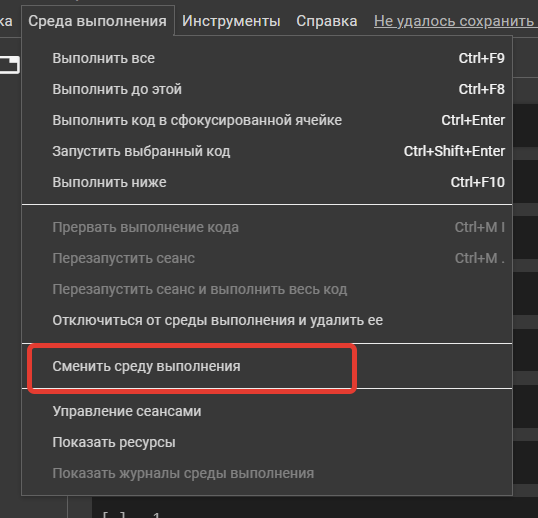

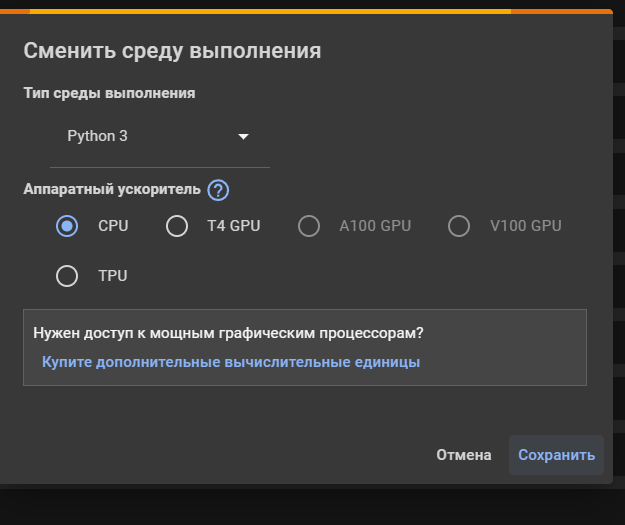

Чтобы проверить, есть ли у вас доступ к графическому процессору Nvidia, вы можете запустить команду, `!nvidia-smi`.

In [69]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


Также вы можете использовать для этого команду из подмодуля `torch.cuda`, `torch.cuda.is_available()`. Если возвращается True, PyTorch видит и может использовать графический процессор.

In [70]:
import torch
torch.cuda.is_available()

False

В PyTorch лучше всего писать код, независимый от устройства. Это означает код, который будет работать на CPU (всегда доступен) или GPU (если доступен). Настроить свой код так, чтобы он работал на CPU или графическом процессоре, если он доступен, можно сделать с помощью переменной следующим образом:

In [71]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

В каких-то случаях может быть сразу несколько GPU, в таком случае `torch.cuda.device_count()` позволяет узнать сколько их.

Как было уже отмечено, тензоры могут храниться либо в памяти GPU, либо CPU (RAM). Операции над тензорами выполняются ТОЛЬКО если они находятся на одном устройстве. Процесс перемещение тензоров между устройствами занимает значительное время, поэтому основные принципы следующие:

* минимизировать число перемещений тензоров с устройства на устройство

* избегать перемещений в ходе вычислений, стараться использовать их до и после блока длительных вычислений

Вы можете поместить тензоры на конкретное устройство, вызвав метод `some_tensor.to(device)`. Размещение тензора на графическом процессоре с помощью `to(device)` возвращает ссылку на копию этого тензора на GPU.

In [72]:
tensor = torch.tensor([1, 2, 3])

print(tensor, tensor.device)

tensor_on_gpu = tensor.to(device)
tensor_on_gpu

tensor([1, 2, 3]) cpu


tensor([1, 2, 3])

из вывода `device='cuda:0'` можно определить, какой именно GPU используется (индексация начинается с нуля)

Если мы захотим переместить тензор обратно на CPU, используем метод `.cpu()`

In [28]:
tensor_back_on_cpu = tensor_on_gpu.cpu()
print(tensor_back_on_cpu.device)
print(tensor_on_gpu.device)

cpu
cpu


---


# 4. Задания


---

**Задание 1.**  Изучите документацию по [torch.Tensor](https://pytorch.org/docs/stable/tensors.html#torch-tensor) и для [torch.cuda](https://pytorch.org/docs/master/notes/cuda.html#cuda-semantics). В отчете данную задачу не описывать.

**Задание 2.** Используя Pytorch - Установите `seed` ГСПЧ на выбранное вами число. Сгенерируйте случайный тензор размерностью 7. Выполните матричное умножение созданного тензора на другой случайный тензор с размерностью (1, 7). Результат отправьте на GPU и сложите с другим тензором. Добавьте в тензор единичное измерение, поменяйте местами первое и последнее измерение. Найдите максимальное и минимальное значения в результате, их индексы.

In [136]:
import torch

seed = 7
torch.manual_seed(seed)

x = torch.randint(0, 10, size=(1,7))
print('x=',x)
y = torch.randint(0, 10,size=(1,7)).reshape(-1)
print('y=',y)
z = x @ y

if torch.cuda.is_available():
 z = z.cuda()

z = z + torch.randint(0,10,size=(1,7)).reshape(-1)

print(z.shape)
z = z.unsqueeze(1)
print(z.shape)

z = z.permute(1,0)
print(z.shape)
print(z)

# Найти максимальное и минимальное значения в z, их индексы
max_value = z.max()
min_value = z.min()
max_index = z.argmax()
min_index = z.argmin()

print("Максимальное значение:", max_value)
print("Индекс максимального значения:", max_index)
print("Минимальное значение:", min_value)
print("Индекс минимального значения:", min_index)


x= tensor([[5, 2, 1, 6, 3, 7, 7]])
y= tensor([9, 8, 1, 8, 1, 8, 7])
torch.Size([7])
torch.Size([7, 1])
torch.Size([1, 7])
tensor([[220, 218, 224, 220, 221, 226, 224]])
Максимальное значение: tensor(226)
Индекс максимального значения: tensor(5)
Минимальное значение: tensor(218)
Индекс минимального значения: tensor(1)


**Задание 3.** Вычислить эффективно параллельно значение функции $f(x, y)$ в узлах двумерной сетки (по координатам $x, y$) с шагом (0.1, 0.01, 0.001, 0.0001) (координаты узлов можно получить так - `np.arange(-5.12, 5.12, step)`) с помощью joblib, pytorch (на GPU и CPU) (на каждый пакет приведите свою реализацию вычисления задачи, измерьте скорость расчетов).

$f(x, y)=A*2 + [x^2 - A cos (2 \pi x_i)] + [y^2 - A cos (2 \pi y)] $

$A = 10; x, y \in [-5.12, 5.12]$

Постройте график на основе вычисленных значений для шагов сетки 0.1 и 0.01 (графики только для этих шагов, иначе mpl зависнет) примерно следующего вида:

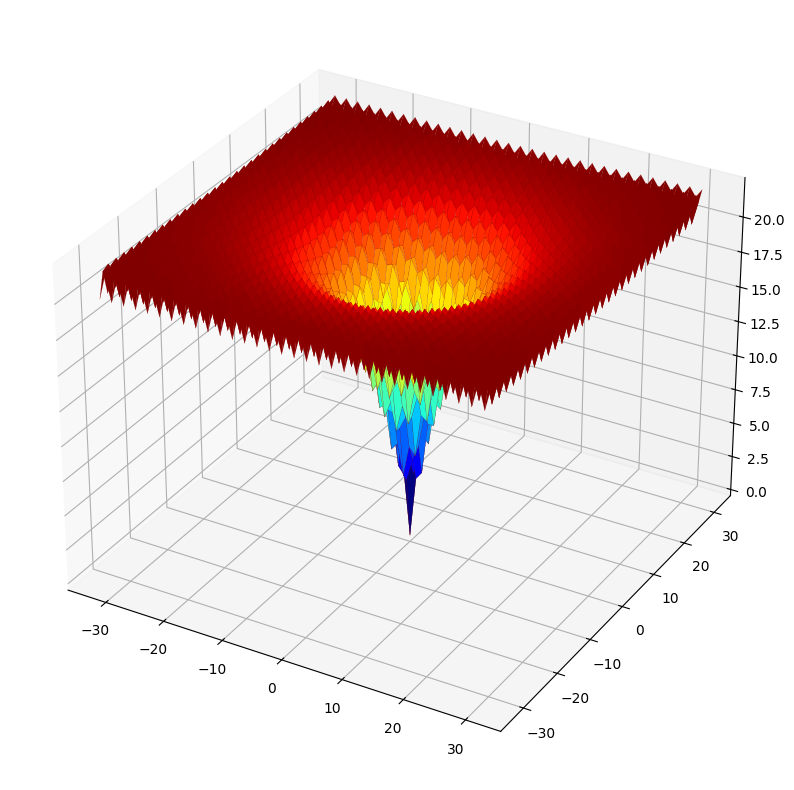

In [5]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

X = np.arange(-32, 32, 1)
Y = np.arange(-32, 32, 1)
X, Y = np.meshgrid(X, Y)

Z = -20.0 * np.exp(-0.2 * np.sqrt(0.5 * (X**2 + Y**2)))-np.exp(0.5 * (np.cos(15 * np.pi * X)+np.cos(15 * np.pi * Y))) + np.e + 20
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection = '3d')
surf = ax.plot_surface(X, Y, Z, \
  rstride=1, cstride=1, cmap=cm.jet, \
  edgecolor='darkred', linewidth=0.1)

plt.show()

---


# 5. Выполнение работы


---

1. Изучить теоретический и практический материал лабораторной работы.
2. Выполнить, задания из раздела 3.
3. Оформить отчёт о выполненной работе.


---


# 5. Отчет


---
Оформить отчёт со следующим содержанием:
* Титульный лист.
* Введение (цель работы, постановка задачи).
* Ход выполнения заданий и описание результатов.
Приведите решение задач в виде кода, скриншоты результатов тестирования.
* Заключение (выводы).

Отчет должен быть оформлен согласно требованиям ОС ТУСУР (https://regulations.tusur.ru/documents/70).